# Partie théorique

### Question 1

On a pour projet d'approcher $L^* $ l'espérance conditionnelle de la longueur du cable comme la moyenne de K simulations conditionnelles de cette même longueur, avec K un grand nombre: $L* \simeq \frac{1}{K}\sum_{i=1}^n l_{(i)}$
\
Cette approimation est possible, et justifiée par la loi faible des grands nombres, sachant que les différentes longeurs simulées sont indépendantes et suivront la même loi. L'expression ci-dessus de $L^*$ converge donc bien quand K tend vers l'infini (K suffisement grand) vers l'esperance conditionelle de $L$

### Question 2

Nous savons que le vecteur des profondeurs aux points de discrétisation sont la réalisation d'un vecteur aléatoire gaussien $Z$. Nous supposons connaître des profondeurs à des sites d'observations, et nous souhaitons connaître les composantes correspondantes de $Z$ au points de discrétisations non observés.
\ 
Pour ce faire, quitte à réordonner l'ordre des abscisses des points de discrétisation, nous écrivons $Z = (X,Y)$ avec $X = (z(x_1),...,z(x_k))$ les profondeurs inconnues (en supposant $0<k<n$) et $Y = (z(x_{k+1}),..., z(x_n)) = y$ les profondeurs observées.
\
Puis, nous nous référons aux résultats des pages 12-13 du chapitre Probabilité IV sur les lois et espérances conditionnelles de vecteurs gaussiens à densité. 
\
En notant $\sum = \begin{pmatrix}\sum_X & \sum_{X,Y} \\ \sum_{Y,X} & \sum_Y \end{pmatrix}$, et $\mu = (\mu,..., \mu) = (\mu_X, \mu_Y)$, on sait que le vecteur aléatoire $X\vert Y$ suit une loi gaussienne d'espérance $\mu_{X\vert Y=y} = \mu_X - \sum_{X,Y}\sum_Y^{-1}(y - \mu_Y)$ et de matrice de covariance $C_X = \sum_X - \sum_{X,Y}\sum_Y^{-1}\sum_{Y,X}$

### Question 3


Soit $Y = (Y_1,..., Y_p)$ un vecteur de composantes gaussiennes centrées réduites indépendantes. $Z = m + RY$ avec $R = (r_{i,j})_{0\leq i,j \leq p}$,  et m un vecteur de taille $p$.

$\bf{Important}$: Nous avons effectué une démonstration mathématique ci dessous qui nous semble juste, cependant, dans les simulations informatiques de la deuxième partie, ses résultats sont à prori faux (cf question 9), par rapport à une méthode qui consisterait simplement à simuler un vecteur de variables aléatoires gaussiennes centrées réduites indépendantes, puis à le multiplier par $R$ et ajouter $m$ (cf les deux méthodes implémentées question suivante). Nous privilégierons donc la deuxième qui est simplement calculatoire et qui d'un point de vue mathématique ne dit pas grand chose... 
\
\
\
Lemme: Soient $(X_1,..., X_j)$ j variables aléatoires gaussiennes indépendantes centrées réduites, et $(p_1,..., p_j)$ des pondérations réelles associées. La variable aléatoire $X = \sum_{i=1}^j p_iX_i$ suit une loi normale centrée d'écart type $\sigma = \sum_{i=1}^j p_i^2$. La preuve est très rapide si l'on utilise les fonctions caractéristiques:
\
Si Y suit une loi normale centrée réduite, sa fonction caractéristique est $\Phi_X : x \rightarrow e^{\frac{-x^2}{2}}$. Soit a un réel. Par changement de variable, il vient la fonction caractéristique d'une loi normale centrée et d'écart type $a^2$: $\Phi_{aX}: x \rightarrow e^{\frac{-(ax)^2}{2}}$ 
\
Puis, la fonction caractéristique d'une somme de variables aléatoires indépendantes étant le produit des fonctions caractéristiques de ces variables, on a par identification le résultat. 
\
Revenons au problème initial: par linéarité, la ième composante de Y suit donc une loi normale de moyenne $m_i$ et d'écart type $\sum_{j=1}^p r_{i,j}^2$.


### Question 4

Un algorithme de simulation conditionelle pour simuler les $l_{(k)}$ se dégage alors: 
\
Nous connaissons la matrice de covariance de $Z$. Donc on peut aisément la découper comme dans la question 2, et trouver la loi du vecteur conditionnel des sites inconnus. 
\
Il s'agit ensuite de la simuler: on peut aisement simuler un vecteur de variables aléatoires indépendantes suivant une loi normale centrée réduite par la méthode de Box-Muller par exemple. Puis, en utilisant la décomposition de Cholesky et la question 3, on pourra finalement simuler ce vecteur conditionel d'espérance et de matrice de covariance connus\
En effet, nous savons que si $X$ est un vecteur gaussien de matrice espérance $m$ et de matrice de covariance définie positive $C$, il existe $A$ une matrice réelle tel que $C = A^tA$ et que si $Y$ est un vecteur gaussien centré réduit de même dimension que $X$, ce dernier suit la même loi que $AY + m$. On retombe donc sur le cas de la question 3.\
Implémentons cette simulation, qui sera necessaire par la suite.

In [32]:
#simule un vecteur gaussien dont on connait le vecteur espérance et la matrice de covariance
import random as rd
import numpy as np
from math import *


###méthode à priori fausse d'après la partie suivante
def Box_Muller(m,sigma):          #simule une loi normale d'esperance et d'écart types m et sigma
    return sigma*sqrt(-2*log(rd.random()))*cos(2*pi*rd.random()) + m   #rd.random() simule une loi uniforme entre 0 et 1
def simul_vect_gaussien2(m, mat_cov):  #m vecteur esperance
    n = np.shape(mat_cov)[0]
    R = np.linalg.cholesky(mat_cov)
    res1 = np.zeros((n,1))
    for i in range (n):
        sigma = sum([R[i,j]**2 for j in range (n)])
        res1[i,0] = Box_Muller(m[i], sigma)
    return res1
    
### méthode utilisée, "brutale"
def simul_vect_gaussien(m, mat_cov):
    R = np.linalg.cholesky(mat_cov)
    return m + R.dot(np.random.randn(len(m)))

# Implémentation informatique

In [3]:

import matplotlib.pyplot as plt

In [4]:
mu = -5
sigma2 = 12
a = 50
def C(x):
    return sigma2*exp(-abs(x)/a)

In [5]:
A = 0
B = 500
N = 101
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta

In [6]:
observation_indexes = [0, 20, 40, 60, 80, 100]
depth = np.array([0, -4, -12.8, -1, -6.5, 0])
unknown_indexes = list(set(discretization_indexes) - set(observation_indexes))

### Question 1

In [7]:
def mat_cov(mat_dist, a = 50, sigma2 = 12):
    n = np.shape(mat_dist)[0]   #mat_dist carrée, de taille (N+1)*(N+1) mais on garde généralité
    res = np.zeros((n, n))
    for i in range (n):
        for j in range(n):     #on va faire deux fois les mêmes calculs: à améliorer avec transpose numpy
            res[i,j] = C(mat_dist[i,j])
    return res

### Question 2

In [8]:
def mat_dist_calc(A = 0, B = 500, N = 101):
    Delta = (B-A)/(N-1)
    res1 = np.zeros((N,N))
    for i in range (N):
        for j in range (N):
            res1[i,j] = abs((j-i)*Delta)
    return res1
mat_dist = mat_dist_calc()
print(mat_dist)

[[  0.   5.  10. ... 490. 495. 500.]
 [  5.   0.   5. ... 485. 490. 495.]
 [ 10.   5.   0. ... 480. 485. 490.]
 ...
 [490. 485. 480. ...   0.   5.  10.]
 [495. 490. 485. ...   5.   0.   5.]
 [500. 495. 490. ...  10.   5.   0.]]


### Question 3

In [9]:
def mat_cov_Z(a = 50, sigma2 = 12, A = 0, B = 500, N=101):
    return mat_cov(mat_dist_calc(A,B,N), a, sigma2)

M_cov_Z = mat_cov_Z()


### Question 4

In [10]:
def sous_matrice( M, Lignes, Colonnes):

     #revoie une sous matrice de la matrice M dont les lignes  de la liste Ligne
     #et les colonnes de la liste Colonnes sont effacées

     Ligne=sorted(Lignes, reverse=True)    #permet de trier la liste dans l'ordre décroissant pour que les indices gardent un sens
     Colonne = sorted(Colonnes, reverse=True)
     
     for elem in Ligne:          #Ainsi nos indices gardent un sens au cours des modifications
         M=np.delete(M, (elem), axis=0)   
     M=np.transpose(M)
        
     for elem in Colonne: 
         M=np.delete(M, (elem), axis=0)
         
     M = np.transpose(M)
     return M

# Puis on extrait les sous matrices de covariances souhaitées
M_cov_observations=sous_matrice(M_cov_Z, unknown_indexes, unknown_indexes)
M_cov_observations_inconnues=sous_matrice(M_cov_Z, unknown_indexes, observation_indexes)
M_cov_inconnues=sous_matrice(M_cov_Z, observation_indexes, observation_indexes)
print(M_cov_observations, M_cov_observations_inconnues,M_cov_inconnues )

### Question 5

[[1.20000000e+01 1.62402340e+00 2.19787667e-01 2.97450261e-02
  4.02555153e-03 5.44799157e-04]
 [1.62402340e+00 1.20000000e+01 1.62402340e+00 2.19787667e-01
  2.97450261e-02 4.02555153e-03]
 [2.19787667e-01 1.62402340e+00 1.20000000e+01 1.62402340e+00
  2.19787667e-01 2.97450261e-02]
 [2.97450261e-02 2.19787667e-01 1.62402340e+00 1.20000000e+01
  1.62402340e+00 2.19787667e-01]
 [4.02555153e-03 2.97450261e-02 2.19787667e-01 1.62402340e+00
  1.20000000e+01 1.62402340e+00]
 [5.44799157e-04 4.02555153e-03 2.97450261e-02 2.19787667e-01
  1.62402340e+00 1.20000000e+01]] [[1.08580490e+01 9.82476904e+00 8.88981865e+00 8.04384055e+00
  7.27836792e+00 6.58573963e+00 5.95902365e+00 5.39194757e+00
  4.87883592e+00 4.41455329e+00 3.99445300e+00 3.61433054e+00
  3.27038152e+00 2.95916357e+00 2.67756192e+00 2.42275822e+00
  2.19220229e+00 1.98358666e+00 1.79482343e+00 1.46947714e+00
  1.32963790e+00 1.20310612e+00 1.08861544e+00 9.85019983e-01
  8.91282939e-01 8.06466153e-01 7.29720752e-01 6.60278641

Nous utilisons là encore les résultats du chapitre IV, qui affirment que, si X est le vecteur des profondeurs inconnues, et Y le vecteur des observations (on reprend les notations de la partie théorique question 2), l'espérance conditionelle $E(X \vert Y)$ est la variable aléatoire $m_X + \sum_{X,Y}\sum_Y^{-1}(Y - m_Y))$

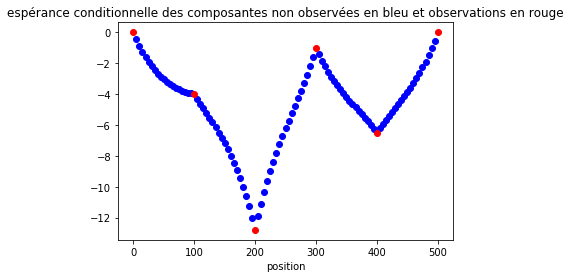

95


In [52]:
#Dans le cas des données, nous sommes en mesure d'expliciter cette formule théorique:
Esperance_conditionnelle=mu+np.transpose(M_cov_observations_inconnues).dot(np.linalg.inv(M_cov_observations)).dot(np.array(depth)-mu)
plt.plot(np.array(unknown_indexes)*Delta, Esperance_conditionnelle, "bo")
plt.plot(np.array(observation_indexes)*Delta, depth, "ro")
plt.xlabel("position")
plt.title("espérance conditionnelle des composantes non observées en bleu et observations en rouge")
plt.show()
print(len(Esperance_conditionnelle))

### Question 6

Pour calculer la matrice de covariance conditionelle, nous allons utiliser le complément de Schur et les propriétés associées. On a $\sum = \begin{pmatrix}\sum_X & \sum_{X,Y} \\ \sum_{Y,X} & \sum_Y \end{pmatrix}$ (cf partie th) . La matrice de covariance conditionelle est donnée par la partie théorique:$M_{cov-cond} = \sum_{X,X} - \sum_{X,Y}\sum_{Y,Y}^{-1}\sum_{Y,X}$. On peut donc calculer cette matrice: 

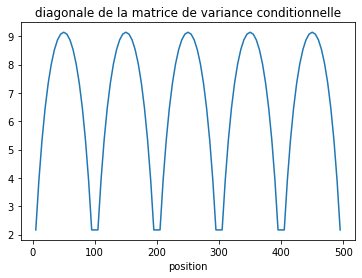

In [12]:
M_cov_cond = M_cov_inconnues - np.transpose(M_cov_observations_inconnues).dot(np.linalg.inv(M_cov_observations)).dot(M_cov_observations_inconnues)

#créons la liste Diagonale_Schur qui contient les termes diagonaux de M_schur
Diagonale_cov_cond=[]
for i in range(len(M_cov_cond)):
    Diagonale_cov_cond.append(M_cov_cond[i][i])

#Traçons celle-ci en fonction de la position
plt.plot(np.array(unknown_indexes)*Delta, Diagonale_cov_cond)
plt.title("diagonale de la matrice de variance conditionnelle")
plt.xlabel("position")
plt.show()
#Plus l'on s'éloigne des mesures plus la variance est élevée car l'incertitude augmente. 
#Même au voisinage des points de mesure, elle semble atteindre un minimum non nul: 
#c'est simplement parcequ'il manque le point de mesure lui même. 

### Question 7

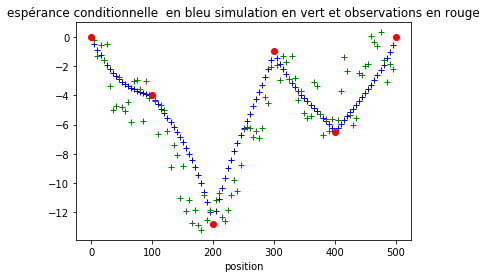

In [104]:
#utilisons les résultats de la partie théorique, avec comme synthèse la question 4.
Esperance_conditionnelle=mu+np.transpose(M_cov_observations_inconnues).dot(np.linalg.inv(M_cov_observations)).dot(np.array(depth)-mu)
vect_moy_cond = mu + np.transpose(M_cov_observations_inconnues).dot(np.linalg.inv(M_cov_observations)).dot(depth - mu)
Simulation_conditionnelle = simul_vect_gaussien(vect_moy_cond, M_cov_cond)
plt.plot(np.array(unknown_indexes)*Delta, Esperance_conditionnelle, "b+")
plt.plot(np.array(unknown_indexes)*Delta, Simulation_conditionnelle, "g+")
plt.plot(np.array(observation_indexes)*Delta, depth, "ro")
    
plt.xlabel("position")
plt.title("espérance conditionnelle  en bleu simulation en vert et observations en rouge")
plt.show()
#Pour une seule simulation, on constate que les points simulés sont plus proches de l'espérance au voisinage des mesures,
#que lorqusqu'ils sont entre deux mesures: cohérent avec les résultats d la question précédente: la variance (l'incertitude) 
#augmente quand on s'éloigne des sites d'observation.

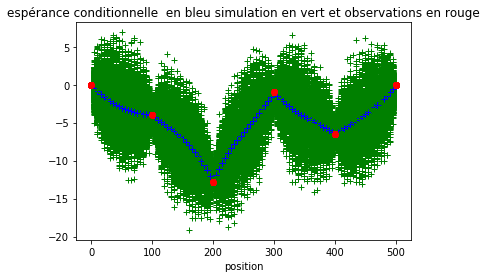

In [106]:
#cette fois-ci avec 500 simulations


for k in range (500):
    Simulation_conditionnelle = simul_vect_gaussien(vect_moy_cond, M_cov_cond)
    plt.plot(np.array(unknown_indexes)*Delta, Esperance_conditionnelle, "b+")
    plt.plot(np.array(unknown_indexes)*Delta, Simulation_conditionnelle, "g+")
    plt.plot(np.array(observation_indexes)*Delta, depth, "ro")
    

plt.xlabel("position")
plt.title("espérance conditionnelle  en bleu simulation en vert et observations en rouge")
plt.show()
#nous observons de belles paraboles qui font écho au tracé de la question précédente.

### Question 8

In [25]:
def lenght_cable(Z,Delta):
    """
    fonction qui calcule la longueur du câble en fonction du vecteur
    des profondeurs et du pas de discrétisation
    """
    L=0
    for k in range(1,len(Z)):
        L+=sqrt(Delta**2+(Z[k]-Z[k-1])**2)
    return L



5.0


10.0

### Question 9

In [74]:
Esperance_conditionnelle=mu+np.transpose(M_cov_observations_inconnues).dot(np.linalg.inv(M_cov_observations)).dot(np.array(depth)-mu)
def calcul_esperance_nb_simul(N):
    longueur_tot = 0
    for k in range (N):  #pour N simulations
        depth_simul = simul_vect_gaussien(vect_moy_cond, M_cov_cond)
        for i, observ_index in enumerate (observation_indexes):
            depth_simul = np.insert(depth_simul, observ_index, depth[i]) #on ajoute les points d'observation au vecteur de profondeur simulé
        longueur_tot += lenght_cable(depth_simul, Delta)
    return longueur_tot/N

for i, observ_index in enumerate (observation_indexes):
    Esperance_conditionnelle = np.insert(Esperance_conditionnelle, observ_index, depth[i])

print(f"L'espérance estimée de la longueur conditionnelle du câble sachant les mesures vaut {calcul_esperance_nb_simul(100)} m contre {lenght_cable(Esperance_conditionnelle, Delta)} m pour la longueur de l'espérance conditionnelle du cable")

### avec l'autre ùméthode de simulation
def calcul_esperance_nb_simul_meth2(N):
    longueur_tot = 0
    for k in range (N):  #pour N simulations
        depth_simul = simul_vect_gaussien2(vect_moy_cond, M_cov_cond)
        for i, observ_index in enumerate (observation_indexes):
            depth_simul = np.insert(depth_simul, observ_index, depth[i]) #on ajoute les points d'observation au vecteur de profondeur simulé
        longueur_tot += lenght_cable(depth_simul, Delta)
    return longueur_tot/N
print(f"Avec l'autre méthode de simulation, on a plutôt {calcul_esperance_nb_simul_meth2(100)} m ce qui ne concorde absolument pas avec la méthode précédente qui est quasi directe, d'où un raisonnement à priori faux ?")

L'espérance estimée de la longueur conditionnelle du câble sachant les mesures vaut 522.242514394132 m contre 501.6468416918411 m pour la longueur de l'espérance conditionnelle du cable
Avec l'autre méthode de simulation, on a plutôt 946.4739950230838 m ce qui ne concorde absolument pas avec la méthode précédente qui est quasi directe, d'où un raisonnement à priori faux ?


Pourquoi une telle différence ? \
Une raison mathématique d'abord: la fonction lenght_cable n'est pas linéaire donc la longueur de l'espérance n'est pas necessairement égale à l'espérance estimée de la longueur (le tout sachant les mesures).\
Concrètement, le graph de la question $5$ nous illustre le fait que le chemin espérance est à priori le plus court (où l'un des plus courts pour ne pas se lancer dans une démonstration rigoureuse). Par conséquent, si on fait la moyenne arithémétique de chemins simulés qui sont en général "moins optimisés", on a forcément une valeur supérieure.


### Question 10

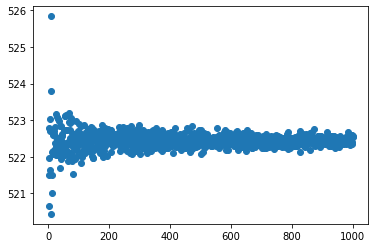

In [107]:
def tracé(N):
    X = [k for k in range (1, N+1)] 
    Y = [calcul_esperance_nb_simul(a) for a in X]
    plt.plot(X,Y, 'o')
    plt.show()
tracé(1000)   
#on constate une convergence vers une valeur moyenne à peu près égale à 522.25, mais qui reste assez fluctuantant à l'échelle du décimètre

### Question 11

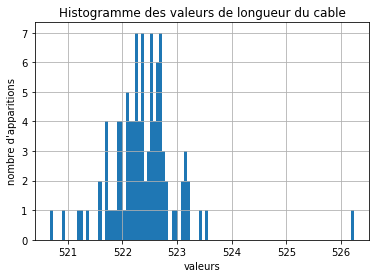

In [92]:
def histogramme(N):
    Liste_valeurs_longueur_cable = [calcul_esperance_nb_simul(a) for a in range (1, N+1)]  #dans les questions suivantes, on refera à chaque fois les 100 simulations pour éviter les effets de bords indésirables, ce ,n'est  pas très long.
    plt.hist(Liste_valeurs_longueur_cable, 100)
    plt.title('Histogramme des valeurs de longueur du cable')
    plt.xlabel('valeurs')
    plt.ylabel("nombre d'apparitions")
    plt.grid(True)
    plt.show()
histogramme(100)
#les valeurs aberrantes correspondent à des nombres très restreints de simulations qui se comptent sur les doigts. 

### Question 12

On fixe le nombre de simulations à 100.
\
Une première méthode grossière pour estimer l'intervalle de confiance à 95% de la longueur du cable consiste simplement, dans le cas $N$ , à effectuer N simulations, estimer la valeur moyenne de cette série, enlever le 5% des mesures les plus éloignées de cette moyenne: on a alors une fourchette de valeurs qui sera une approximation de cet intervalle de confiance.


In [115]:
import statistics as st
import operator
def interv_confiance_meth1(N):
    Liste_valeurs_simulées = [calcul_esperance_nb_simul(a) for a in range (1, N+1)]
    nombre_a_enlever = int(0.05*N) + 1 #on arrondit à l'excès, quitte à trop enlever, on passera peut être au dessus des 95% dans cette approximation
    moyenne=st.mean(Liste_valeurs_simulées)
    liste_ecarts = [(abs(Liste_valeurs_simulées[i]), i) for i in range (N)] #on a à la fois l'écart et la position dans la liste initiale
    liste_ecarts.sort(key=operator.itemgetter(0)) #on trie par rapport aux écarts croissants
    for k in range (nombre_a_enlever):
        del(Liste_valeurs_simulées[liste_ecarts[k][1]]) #on enlève les valeurs les plus éloignées
    print(f"l'intervalle de confiance à 95% peut être approché par {[min(Liste_valeurs_simulées), max(Liste_valeurs_simulées)]}")
    
interv_confiance_meth1(100)

l'intervalle de confiance à 95% peut être approché par [521.320249064525, 526.9100559637743]


Une deuxième méthode considérée, qui sera plus grossière si l'on prend un nombre de simulation petit, mais qui sera très performant si $N$ grandit, c'est d'approximer la distribution des longueurs par une loi normale. \
Cette méthode est valide pour $N$ assez grand car la distribution de moyenne empirique tend vers une loi normale par le théorème central limite. A ce stade, estimant la moyenne de cette distribution et son écart type, on peut expliciter l'intervalle de confiance à 95%: $I(N) = [m_N - 1.96\frac{\sigma_N}{\sqrt N}, m_N + 1.96\frac{\sigma_N}{\sqrt N}]$ où $m_N$ est la moyenne empirique (arithmétique) de la distribution observée, et $\sigma_n$ son écart type 

In [114]:

def interv_confiance_meth2(N):
    Liste_valeurs_simulées = [calcul_esperance_nb_simul(a) for a in range (1, N+1)]
    moyenne=st.mean(Liste_valeurs_simulées) #moyenne empirique
    equart_type=st.pstdev(Liste_valeurs_simulées) #ecart type
    taille_echantillon=len(Liste_valeurs_simulées)
    Intervalle_de_confiance=[moyenne-1.96*equart_type/np.sqrt(taille_echantillon), moyenne+2*equart_type/np.sqrt(taille_echantillon)]
    print(f"l'intervalle de confiance à 95% peut être approché par {Intervalle_de_confiance}")

interv_confiance_meth2(100)

l'intervalle de confiance à 95% peut être approché par [522.3139668725087, 522.5873513922473]


Nous constatons que la méthode $2$ est beaucoup plus précise que la première: incertitude à la dizaine de centimètre au lieu du mètre. Celà ne va aller qu'en s'améliorant si $N$ augmente.

### Question 13

In [100]:
def proba_depasser_525(N):
    dep = 0
    Liste_valeurs_simulées = [calcul_esperance_nb_simul(a) for a in range (1, N+1)]
    for mesure in Liste_valeurs_simulées:
        if mesure >525:
            dep +=1
    return dep/N

#evidement, l'estimation n'a un sens qu'à partir d'un certain nombre de simulations
print(proba_depasser_525(100))

0.02
0.02


### Question 14

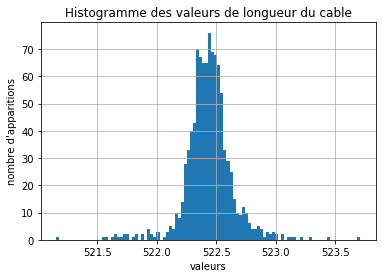

l'intervalle de confiance à 95% est [522.0239341997423, 522.8115266438443]
l'intervalle de confiance à 95% est [522.415868301199, 522.4516309495694]


0.001

In [101]:
##1000 simulations
histogramme(1000)
interv_confiance_meth1(1000)
interv_confiance_meth2(1000)
proba_depasser_525(1000)

On a les prévisions attendues, à savoir que la méthode gaussienne gagne de la précision, en divisant l'incertitude qui décroit en $\frac{1}{\sqrt N}$. De plus, la probabilité de dépasser 525 diminue et la fiabilité du chiffre augmente. La méthode 1 est toujours correcte au mètre près mais pas davantage ce qui est cohérent puisque elle n'a aucune raison de s'améliorer. 

In [116]:
##10000 simulations     
histogramme(10000)
interv_confiance_meth1(10000)
interv_confiance_meth2(10000)
proba_depasser_525(10000)  

KeyboardInterrupt: 